

```
# Isto está formatado como código
```

O problema das 8 rainhas

Solução encontrada: [5, 2, 6, 1, 3, 7, 0, 4]


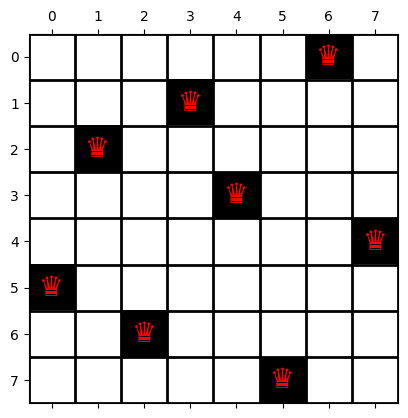

Função objetivo (aptidão final): 28
Tempo de execução: 14.2548 segundos


In [1]:
import random
import math
import time
import matplotlib.pyplot as plt
import numpy as np

# Função para contar o número de conflitos (pares de rainhas se atacando)
def conflitos(tabuleiro):
    conflitos = 0
    tamanho = len(tabuleiro)
    for i in range(tamanho):
        for j in range(i + 1, tamanho):
            if tabuleiro[i] == tabuleiro[j] or abs(tabuleiro[i] - tabuleiro[j]) == abs(i - j):
                conflitos += 1
    return conflitos

# Função f(x): retorna 28 menos o número de pares de rainhas se atacando
def f(tabuleiro):
    total_pares = 28  # Número total de pares entre 8 rainhas (C(8,2) = 28)
    num_conflitos = conflitos(tabuleiro)
    return total_pares - num_conflitos

# Função de vizinhança com perturbação controlada (altera apenas uma posição)
def vizinho_controlado(tabuleiro):
    novo_tabuleiro = tabuleiro[:]
    coluna = random.randint(0, 7)
    linha = random.randint(0, 7)
    novo_tabuleiro[coluna] = linha
    return novo_tabuleiro

# Funções de escalonamento de temperatura
def escalonamento_linear(temperatura_inicial, i, max_iteracoes):
    return temperatura_inicial - i * (temperatura_inicial / max_iteracoes)

def escalonamento_geometrico(temperatura_inicial, fator_resfriamento, i):
    return temperatura_inicial * (fator_resfriamento ** i)

def escalonamento_logaritmico(temperatura_inicial, i):
    return temperatura_inicial / math.log(i + 2)

# Função para desenhar o tabuleiro com as rainhas
def desenha_tabuleiro(tabuleiro):
    tabuleiro_vazio = np.zeros((8, 8))

    # Preenche o tabuleiro com 1s onde as rainhas estão posicionadas
    for i in range(len(tabuleiro)):
        tabuleiro_vazio[tabuleiro[i], i] = 1

    fig, ax = plt.subplots()
    ax.matshow(tabuleiro_vazio, cmap='binary')

    # Desenha as rainhas
    for i in range(8):
        for j in range(8):
            if tabuleiro_vazio[i, j] == 1:
                ax.text(j, i, '♛', va='center', ha='center', color='red', fontsize=20)

    # Adicionar as linhas para separar as linhas e colunas
    ax.set_xticks(np.arange(-.5, 8, 1), minor=True)
    ax.set_yticks(np.arange(-.5, 8, 1), minor=True)
    ax.grid(which="minor", color="black", linestyle='-', linewidth=2)
    ax.tick_params(which="minor", size=0)  # Remove as marcações dos eixos

    plt.show()

# Implementação da Têmpera Simulada
def tempera_simulada(temperatura_inicial, max_iteracoes, escalonamento):
    # Inicialização
    tabuleiro = [random.randint(0, 7) for _ in range(8)]
    historico_aptidao = []
    i = 0

    while i < max_iteracoes and conflitos(tabuleiro) > 0:
        aptidao_atual = f(tabuleiro)  # Usa f(tabuleiro) em vez de conflitos
        historico_aptidao.append(aptidao_atual)

        # Escolha de um vizinho
        novo_tabuleiro = vizinho_controlado(tabuleiro)
        aptidao_novo = f(novo_tabuleiro)

        # Cálculo da diferença de aptidão
        delta_aptidao = aptidao_novo - aptidao_atual

        # Atualização da temperatura
        if escalonamento == 'linear':
            temperatura = escalonamento_linear(temperatura_inicial, i, max_iteracoes)
        elif escalonamento == 'geometrico':
            fator_resfriamento = 0.995  # Pode ser ajustado
            temperatura = escalonamento_geometrico(temperatura_inicial, fator_resfriamento, i)
        elif escalonamento == 'logaritmico':
            temperatura = escalonamento_logaritmico(temperatura_inicial, i)
        else:
            raise ValueError("Tipo de escalonamento inválido. Escolha 'linear', 'geometrico' ou 'logaritmico'.")

        # Critério de aceitação
        if delta_aptidao > 0:
            tabuleiro = novo_tabuleiro
        else:
            probabilidade = math.exp(delta_aptidao / temperatura)
            if random.uniform(0, 1) < probabilidade:
                tabuleiro = novo_tabuleiro

        i += 1

    return tabuleiro, conflitos(tabuleiro), historico_aptidao

# Função principal para encontrar a primeira solução válida
def encontrar_primeira_solucao():
    inicio = time.time()
    temperatura_inicial = 1000
    max_iteracoes = 1000
    tipo_escalonamento = 'logaritmico'  # Pode ser 'linear', 'geometrico' ou 'logaritmico'

    while True:
        tabuleiro, conflitos_finais, historico_aptidao = tempera_simulada(
            temperatura_inicial, max_iteracoes, tipo_escalonamento)

        if conflitos_finais == 0:
            fim = time.time()
            print(f"Solução encontrada: {tabuleiro}")
            desenha_tabuleiro(tabuleiro)
            print(f"Função objetivo (aptidão final): {f(tabuleiro)}")
            print(f"Tempo de execução: {fim - inicio:.4f} segundos")
            break

encontrar_primeira_solucao()
